<a href="https://colab.research.google.com/github/uppalurivenugopal/uvg_ml_dataset/blob/main/Breat_cancer_final_03062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#Project Objective

In [2]:
#Given certain parameters, predict whether the patient's medical inputs point to a cancer that is benign or malignant

#Data Importing

In [3]:
breast_cancer=pd.read_csv(r"https://raw.githubusercontent.com/uppalurivenugopal/uvg_ml_dataset/main/Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set.csv")

In [4]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Attribute Information:

# 1) ID number
# 2) Diagnosis (M = malignant, B = benign)
# 3-32)

# Ten real-valued features are computed for each cell nucleus:

# a) radius (mean of distances from center to points on the perimeter)
# b) texture (standard deviation of gray-scale values)
# c) perimeter
# d) area
# e) smoothness (local variation in radius lengths)
# f) compactness (perimeter^2 / area - 1.0)
# g) concavity (severity of concave portions of the contour)
# h) concave points (number of concave portions of the contour)
# i) symmetry
# j) fractal dimension ("coastline approximation" - 1)

# The mean, standard error and "worst" or largest (mean of the three
# largest values) of these features were computed for each image,
# resulting in 30 features. For instance, field 3 is Mean Radius, field
# 13 is Radius SE, field 23 is Worst Radius.

# All feature values are recoded with four significant digits.

# Missing attribute values: none

In [6]:
breast_cancer['diagnosis'].value_counts()
# 357 Benign (not a threat), 212 Malignant (indicates cancer, threat)

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
#converting target variables to numeric for modelling purpose
breast_cancer['diagnosis_new']=breast_cancer['diagnosis'].map({'B':1,'M':0}).astype(int)

In [8]:
df=breast_cancer.drop(columns=['id','Unnamed: 32'], axis=1)

In [9]:
df=breast_cancer.drop(columns=['id','Unnamed: 32','diagnosis'], axis=1)

In [10]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_new
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9717ca9c90>,
      dtype=object)

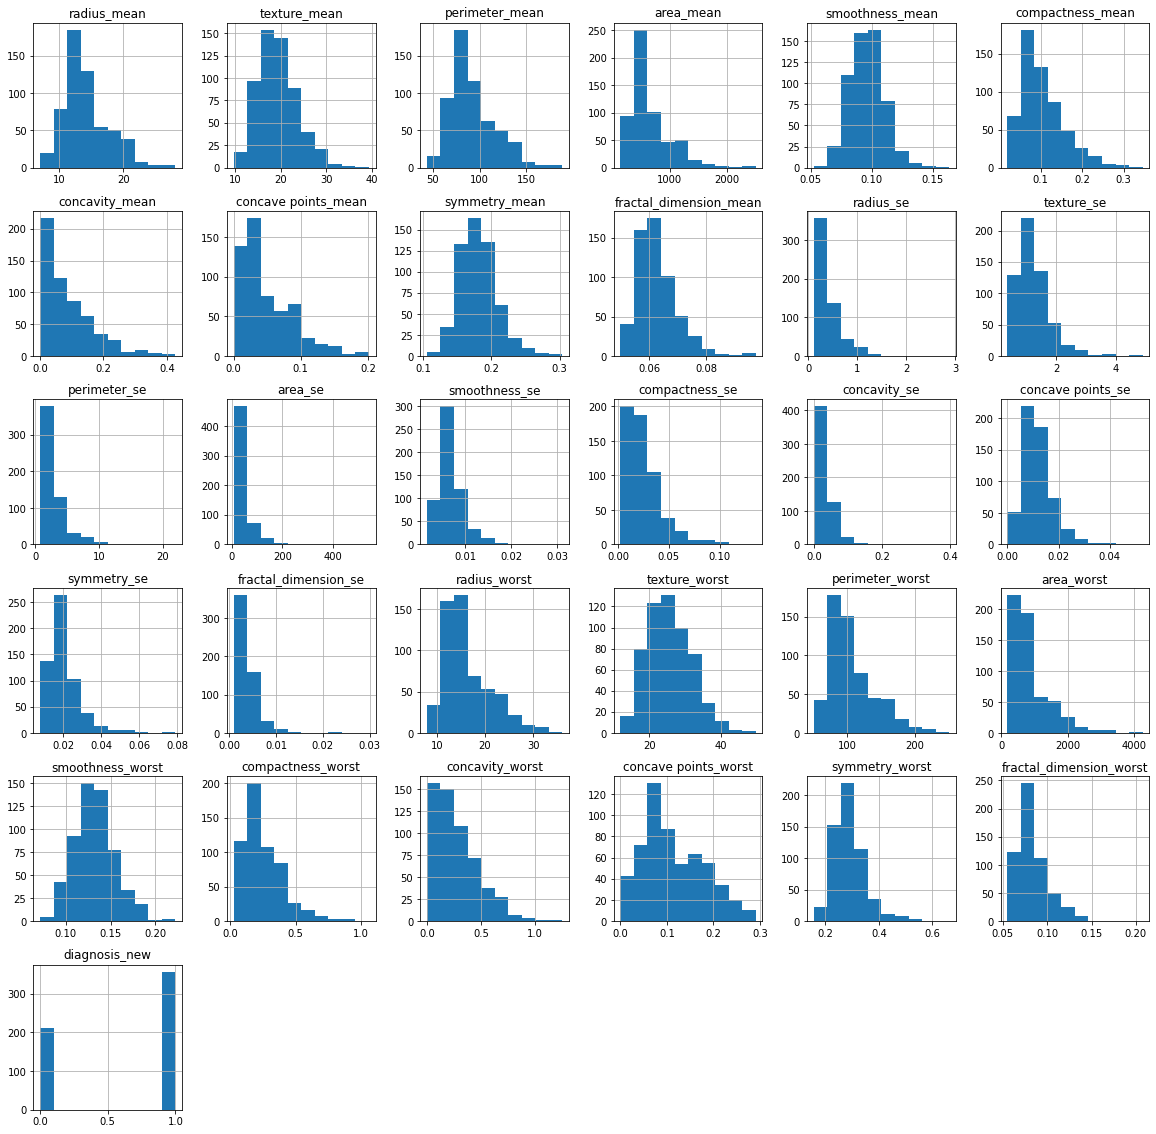

In [12]:
df.hist(bins=10,figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9716805490>,
      dtype=object)

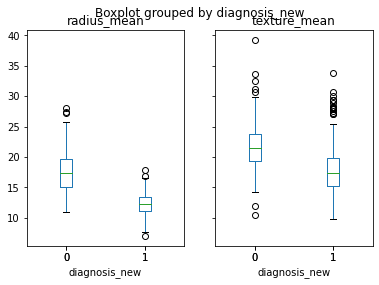

In [13]:
import matplotlib.pyplot as plt
df.boxplot(by ='diagnosis_new', column =['radius_mean','texture_mean'], grid = False)
#Few outliers in radius_mean and lot of outliers in texture_mean

#Exploring variable - Radius_Mean

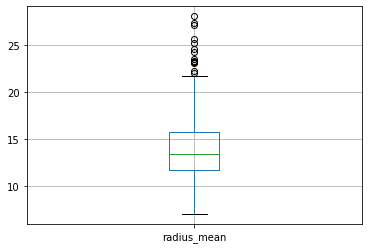

In [14]:
radius_mean_boxplot = df.boxplot(column=['radius_mean'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


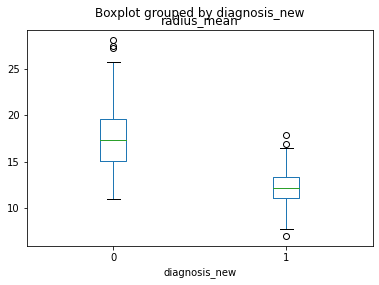

In [15]:
import matplotlib.pyplot as plt
df.boxplot(by ='diagnosis_new', column =['radius_mean'], grid = False)

In [16]:
df['radius_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00     6.9810
0.10    10.2600
0.20    11.3660
0.30    12.0120
0.40    12.7260
0.50    13.3700
0.60    14.0580
0.70    15.0560
0.80    17.0680
0.90    19.5300
0.91    19.6692
0.92    19.8548
0.93    20.1848
0.94    20.4320
0.95    20.5760
0.96    20.9256
0.97    21.5524
0.98    22.7948
0.99    24.3716
1.00    28.1100
Name: radius_mean, dtype: float64

In [17]:
print(df['radius_mean'].median())
print(df['radius_mean'].mean())

13.37
14.127291739894563


In [18]:
# Radius_mean variable's mean and median and very close. THis indicates that the data spread is uniform. We will be replacing the outliers (0 and 100th percentile) with median value

In [19]:
median_radius=df['radius_mean'].median()
df['radius_mean_new']=df['radius_mean']
df['radius_mean_new'][df['radius_mean_new']>25]=median_radius
df['radius_mean_new'][df['radius_mean_new']<10]=median_radius

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


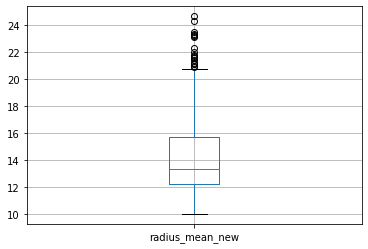

In [20]:
radius_mean_boxplot = df.boxplot(column=['radius_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


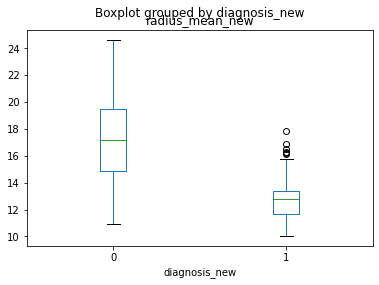

In [21]:
df.boxplot(by ='diagnosis_new', column =['radius_mean_new'], grid = False)
#Median radius_mean for benign patient is ~13 while that for malignant patient is ~18. If the radius_mean is greater than 16, there is a higher chance that the tumor is malignant

#Exploring variable - Texture_mean

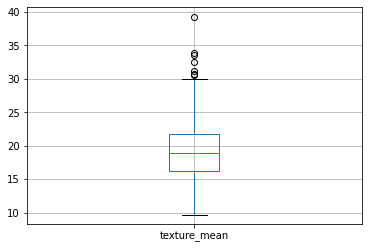

In [22]:
texture_mean_boxplot = df.boxplot(column=['texture_mean'])
#High-side outliers in the data

In [23]:
df['texture_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00     9.7100
0.10    14.0780
0.20    15.6560
0.30    16.8400
0.40    17.9120
0.50    18.8400
0.60    19.9680
0.70    21.2720
0.80    22.4400
0.90    24.9920
0.91    25.1916
0.92    25.4312
0.93    26.3332
0.94    26.8576
0.95    27.1500
0.96    27.9220
0.97    28.2096
0.98    29.3156
0.99    30.6520
1.00    39.2800
Name: texture_mean, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


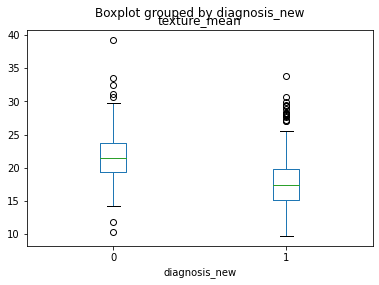

In [24]:
df.boxplot(by ='diagnosis_new', column =['texture_mean'], grid = False)

In [25]:
print(df['texture_mean'].median())
print(df['texture_mean'].mean())

18.84
19.28964850615117


In [26]:
# Texture_mean variable's mean and median and very close. THis indicates that the data spread is uniform. We will be replacing the outliers (0 and 100th percentile) with median value

In [27]:
median_texture=df['texture_mean'].median()
df['texture_mean_new']=df['texture_mean']
df['texture_mean_new'][df['texture_mean_new']>30]=median_radius

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


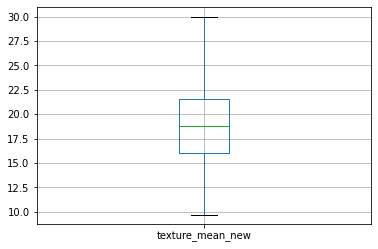

In [28]:
texture_mean_new_boxplot = df.boxplot(column=['texture_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


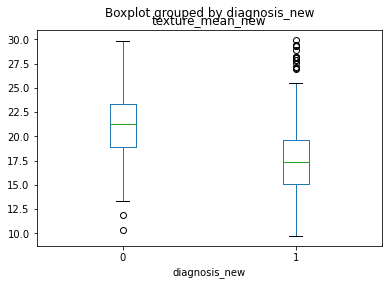

In [29]:
df.boxplot(by ='diagnosis_new', column =['texture_mean_new'], grid = False)
#If the texture_mean is greater than 25, there is a very high chance that the tumor is malignant. Median of texture is ~17.5 for benign patients while it is ~21 for malignant patients

# Exploring Variable - Perimteter Mean (didnot treat outliers)

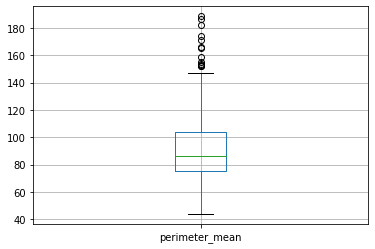

In [30]:
perimeter_mean_boxplot = df.boxplot(column=['perimeter_mean'])
#High-side outliers in the data

In [31]:
df['perimeter_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform. Not treating the outliers

0.00     43.790
0.10     65.830
0.20     73.292
0.30     77.360
0.40     81.938
0.50     86.240
0.60     91.420
0.70     98.200
0.80    111.680
0.90    129.100
0.91    130.000
0.92    131.156
0.93    133.068
0.94    134.676
0.95    135.820
0.96    139.236
0.97    142.988
0.98    152.100
0.99    165.724
1.00    188.500
Name: perimeter_mean, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


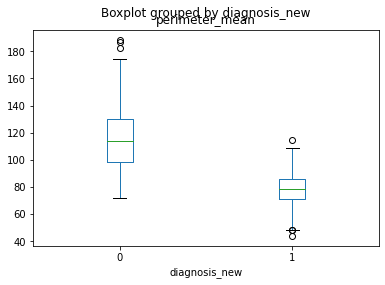

In [32]:
df.boxplot(by ='diagnosis_new', column =['perimeter_mean'], grid = False)
# Median perimeter mean is significantly higher in Malignant cases than in Benign cases. In fact, the median perimeter mean starts from 100th quartile of benign patients. 
# If the permieter mean is above 120, there are high chances that the patient can be diagnosed as malignant

#Exploring Variable - Area Mean

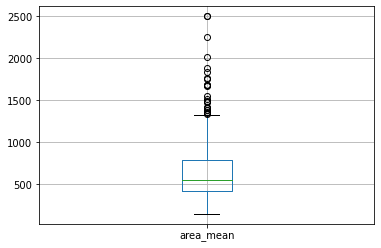

In [33]:
area_mean_boxplot = df.boxplot(column=['area_mean'])
#High-side outliers in the data

In [34]:
df['area_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform till 97th percentile. will replace remaining values with median

0.00     143.50
0.10     321.60
0.20     396.56
0.30     444.06
0.40     496.44
0.50     551.10
0.60     609.74
0.70     700.66
0.80     915.06
0.90    1177.40
0.91    1206.88
0.92    1232.24
0.93    1261.72
0.94    1289.84
0.95    1309.80
0.96    1351.76
0.97    1418.52
0.98    1625.36
0.99    1786.60
1.00    2501.00
Name: area_mean, dtype: float64

In [35]:
print(df['area_mean'].mean())
print(df['area_mean'].median())
#Mean and Median are closer. we will replace with median

654.8891036906857
551.1


In [36]:
median_area=df['area_mean'].median()
df['area_mean_new']=df['area_mean']
df['area_mean_new'][df['area_mean_new']>1500]=median_area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


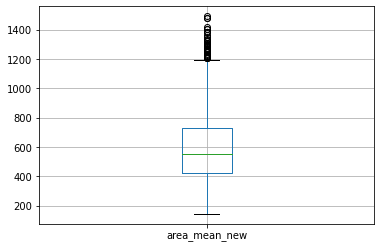

In [37]:
area_mean_new_boxplot = df.boxplot(column=['area_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


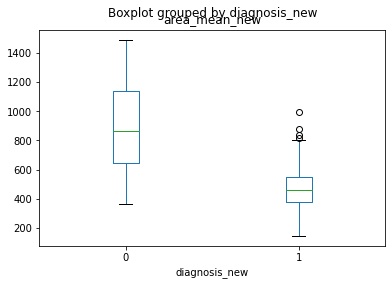

In [38]:
df.boxplot(by ='diagnosis_new', column =['area_mean_new'], grid = False)
# Median Area mean is significantly higher in Malignant cases than in Benign cases. In fact, the median perimeter mean starts from 100th quartile of benign patients. 
# If the area mean is above 800, there are high chances that the patient can be diagnosed as malignant

#Exploring Variable - Smoothness Mean

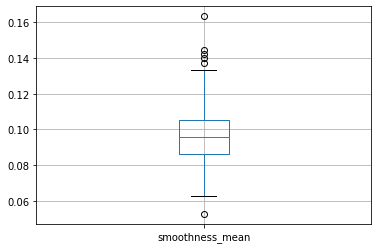

In [39]:
Smoothness_mean_boxplot = df.boxplot(column=['smoothness_mean'])

In [40]:
df['smoothness_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace remaining values with median

0.00    0.052630
0.10    0.079654
0.20    0.084206
0.30    0.087914
0.40    0.091828
0.50    0.095870
0.60    0.099338
0.70    0.103260
0.80    0.107500
0.90    0.114820
0.91    0.115176
0.92    0.116112
0.93    0.116748
0.94    0.117476
0.95    0.118780
0.96    0.121656
0.97    0.123696
0.98    0.126724
0.99    0.132888
1.00    0.163400
Name: smoothness_mean, dtype: float64

In [41]:
print(df['smoothness_mean'].mean())
print(df['smoothness_mean'].median())
#Mean and median are almost similar

0.096360281195079
0.09587


In [42]:
median_smoothness=df['smoothness_mean'].median()
df['smoothness_mean_new']=df['smoothness_mean']
df['smoothness_mean_new'][df['smoothness_mean_new']>0.14]=median_smoothness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


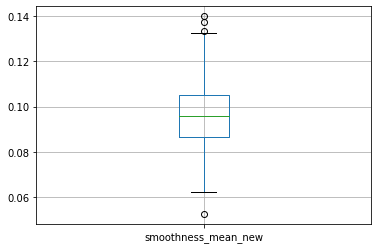

In [43]:
smoothness_mean_new_boxplot = df.boxplot(column=['smoothness_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


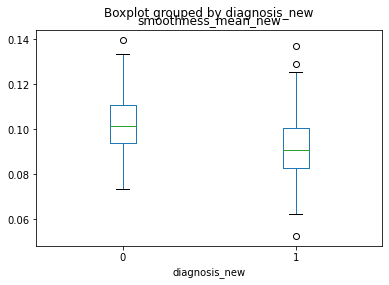

In [44]:
df.boxplot(by ='diagnosis_new', column =['smoothness_mean_new'], grid = False)
# Slight variatio in smoothness median between benign and malignant cases. Need to check the p-value before taking any action on this variable 

#Exploring Variable - Compactness Mean

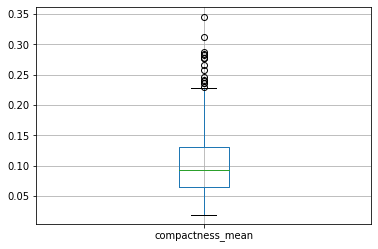

In [45]:
compactness_mean_boxplot = df.boxplot(column=['compactness_mean'])

In [46]:
df['compactness_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace remaining values with median

0.00    0.019380
0.10    0.049700
0.20    0.059638
0.30    0.070390
0.40    0.079530
0.50    0.092630
0.60    0.108740
0.70    0.122420
0.80    0.141900
0.90    0.175460
0.91    0.180640
0.92    0.186912
0.93    0.193728
0.94    0.200272
0.95    0.208700
0.96    0.219392
0.97    0.227452
0.98    0.240688
0.99    0.277192
1.00    0.345400
Name: compactness_mean, dtype: float64

In [47]:
print(df['compactness_mean'].mean())
print(df['compactness_mean'].median())
#Mean and Median closer. Data points are well distributed

0.10434098418277686
0.09263


In [48]:
median_compactness=df['compactness_mean'].median()
df['compactness_mean_new']=df['compactness_mean']
df['compactness_mean_new'][df['compactness_mean_new']>0.28]=median_compactness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


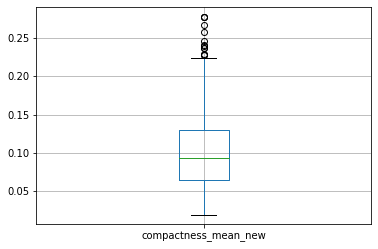

In [49]:
compactness_mean_new_boxplot = df.boxplot(column=['compactness_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


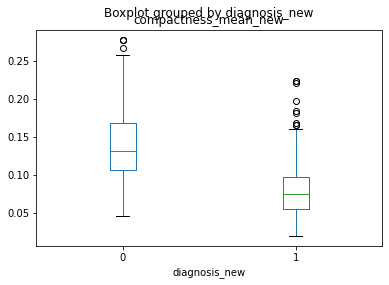

In [50]:
df.boxplot(by ='diagnosis_new', column =['compactness_mean_new'], grid = False)
# Variatio in smoothness median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Concavity_mean

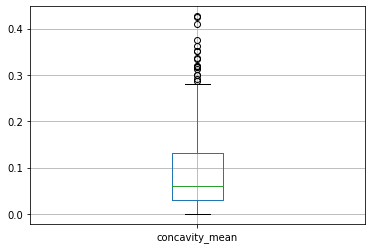

In [51]:
concavity_mean_boxplot = df.boxplot(column=['concavity_mean'])

In [52]:
df['concavity_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace remaining values with median

0.00    0.000000
0.10    0.013686
0.20    0.024930
0.30    0.034400
0.40    0.045070
0.50    0.061540
0.60    0.086212
0.70    0.111920
0.80    0.149780
0.90    0.203040
0.91    0.208404
0.92    0.213556
0.93    0.223068
0.94    0.230600
0.95    0.243020
0.96    0.254640
0.97    0.286856
0.98    0.317528
0.99    0.351688
1.00    0.426800
Name: concavity_mean, dtype: float64

In [53]:
print(df['concavity_mean'].mean())
print(df['concavity_mean'].median())
#Mean and Median closer. Data points are well distributed

0.08879931581722322
0.06154


In [54]:
median_concavity=df['concavity_mean'].median()
df['concavity_mean_new']=df['concavity_mean']
df['concavity_mean_new'][df['concavity_mean_new']>0.28]=median_concavity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


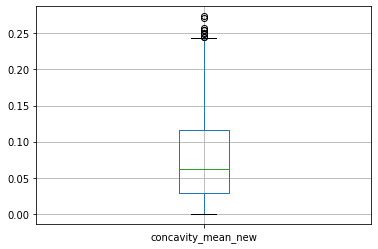

In [55]:
concavity_mean_new_boxplot = df.boxplot(column=['concavity_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


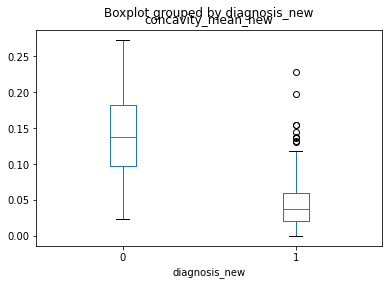

In [56]:
df.boxplot(by ='diagnosis_new', column =['concavity_mean_new'], grid = False)
# Variatio in concavity median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Concave Points Mean

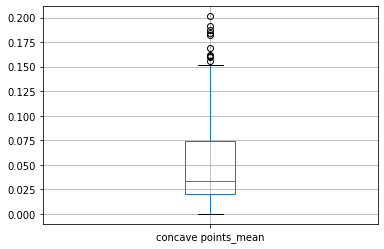

In [57]:
concave_points_mean_boxplot = df.boxplot(column=['concave points_mean'])

In [58]:
df['concave points_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace remaining values with median

0.00    0.000000
0.10    0.011158
0.20    0.017866
0.30    0.022788
0.40    0.027982
0.50    0.033500
0.60    0.048318
0.70    0.064496
0.80    0.084254
0.90    0.100420
0.91    0.104300
0.92    0.108448
0.93    0.112652
0.94    0.120260
0.95    0.125740
0.96    0.131336
0.97    0.146664
0.98    0.150292
0.99    0.164208
1.00    0.201200
Name: concave points_mean, dtype: float64

In [59]:
print(df['concave points_mean'].mean())
print(df['concave points_mean'].median())
#Mean and Median closer. Data points are well distributed

0.048919145869947236
0.0335


In [60]:
median_concave_points=df['concave points_mean'].median()
df['concave_points_mean_new']=df['concave points_mean']
df['concave_points_mean_new'][df['concave_points_mean_new']>0.28]=median_concave_points

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


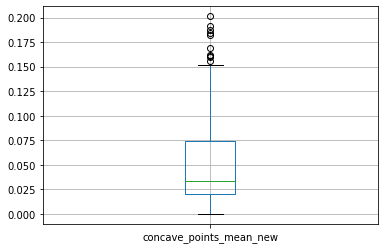

In [61]:
concave_points_mean_new_boxplot = df.boxplot(column=['concave_points_mean_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


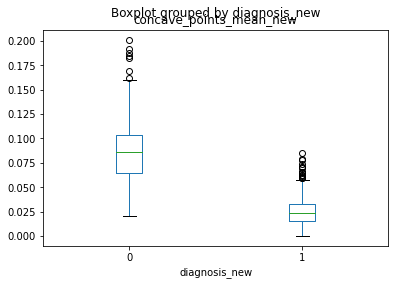

In [62]:
df.boxplot(by ='diagnosis_new', column =['concave_points_mean_new'], grid = False)
# Variation in concavity median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Symmetry Mean (Comment - did not treat outliers)

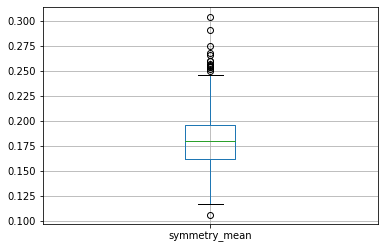

In [63]:
symmetry_mean_boxplot = df.boxplot(column=['symmetry_mean'])

In [64]:
df['symmetry_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform

0.00    0.106000
0.10    0.149580
0.20    0.158760
0.30    0.165080
0.40    0.172000
0.50    0.179200
0.60    0.185480
0.70    0.192800
0.80    0.200540
0.90    0.214940
0.91    0.216288
0.92    0.219248
0.93    0.220788
0.94    0.224892
0.95    0.230720
0.96    0.237584
0.97    0.239796
0.98    0.253188
0.99    0.259564
1.00    0.304000
Name: symmetry_mean, dtype: float64

In [65]:
print(df['symmetry_mean'].mean())
print(df['symmetry_mean'].median())

0.181161862917399
0.1792


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


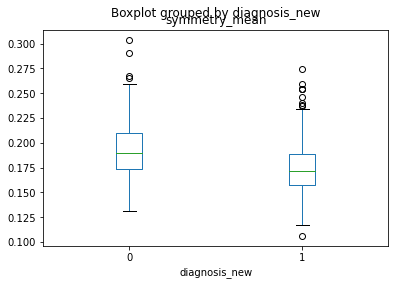

In [66]:
df.boxplot(by ='diagnosis_new', column =['symmetry_mean'], grid = False)
# Slight Variatio in symmetry median between benign and malignant cases. Need to take further action in the next stage

#Exploring Variable - Fractal Dimension Mean (did not treat outliers)

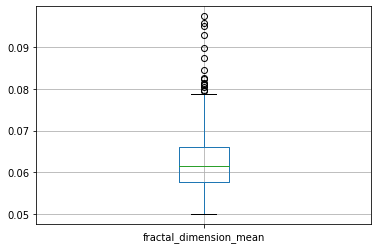

In [67]:
fractal_dimension_mean_boxplot = df.boxplot(column=['fractal_dimension_mean'])

In [68]:
df['fractal_dimension_mean'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform. Not treating outliers

0.00    0.049960
0.10    0.055338
0.20    0.056864
0.30    0.058840
0.40    0.060204
0.50    0.061540
0.60    0.063148
0.70    0.065048
0.80    0.067630
0.90    0.072266
0.91    0.072549
0.92    0.073250
0.93    0.073753
0.94    0.074204
0.95    0.076090
0.96    0.077114
0.97    0.078173
0.98    0.080831
0.99    0.085438
1.00    0.097440
Name: fractal_dimension_mean, dtype: float64

In [69]:
print(df['fractal_dimension_mean'].mean())
print(df['fractal_dimension_mean'].median())
#Mean and Median almost similar

0.06279760984182778
0.06154


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


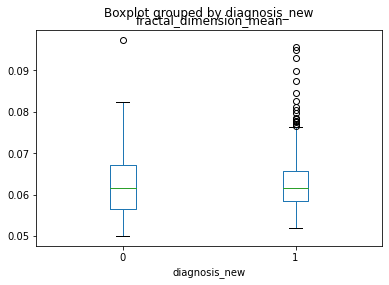

In [70]:
df.boxplot(by ='diagnosis_new', column =['fractal_dimension_mean'], grid = False)
# No Variatio in Fractal Dimesnion median between benign and malignant cases. Need to take further action in the next stage

#Exploring Variable - Radius se

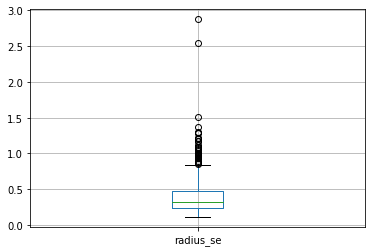

In [71]:
radius_se_boxplot = df.boxplot(column=['radius_se'])

In [72]:
df['radius_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile

0.00    0.111500
0.10    0.183080
0.20    0.219280
0.30    0.246040
0.40    0.280200
0.50    0.324200
0.60    0.369460
0.70    0.431020
0.80    0.546140
0.90    0.748880
0.91    0.766028
0.92    0.817780
0.93    0.835112
0.94    0.896004
0.95    0.959520
0.96    0.996256
0.97    1.057520
0.98    1.170200
0.99    1.291320
1.00    2.873000
Name: radius_se, dtype: float64

In [73]:
print(df['radius_se'].mean())
print(df['radius_se'].median())
#Mean and Median are slightly far

0.4051720562390161
0.3242


In [74]:
median_radius_se=df['radius_se'].median()
df['radius_se_new']=df['radius_se']
df['radius_se_new'][df['radius_se_new']>1.3]=median_radius_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


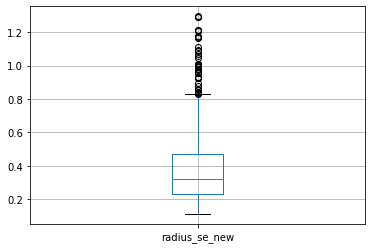

In [75]:
radius_se_new_boxplot = df.boxplot(column=['radius_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


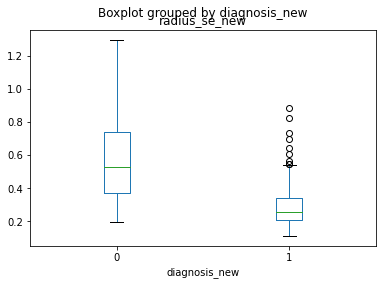

In [76]:
df.boxplot(by ='diagnosis_new', column =['radius_se_new'], grid = False)
# Variation in Radius_se_new median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Radius worst (did not treat outliers)

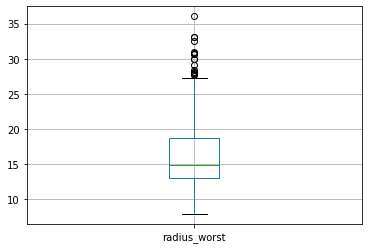

In [77]:
radius_worst_boxplot = df.boxplot(column=['radius_worst'])

In [78]:
df['radius_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00     7.9300
0.10    11.2340
0.20    12.4980
0.30    13.3140
0.40    14.0080
0.50    14.9700
0.60    16.0040
0.70    17.3860
0.80    20.2940
0.90    23.6820
0.91    23.9480
0.92    24.2592
0.93    24.5448
0.94    25.2672
0.95    25.6400
0.96    26.0536
0.97    27.2964
0.98    28.3244
0.99    30.7628
1.00    36.0400
Name: radius_worst, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


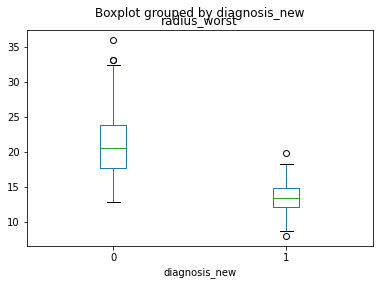

In [79]:
df.boxplot(by ='diagnosis_new', column =['radius_worst'], grid = False)
# Variation in Radius_worst median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Texture se

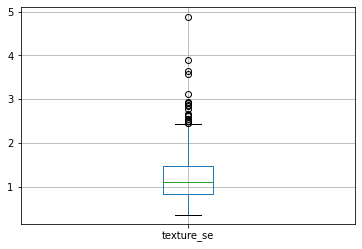

In [80]:
texture_se_boxplot = df.boxplot(column=['texture_se'])
#High-side outliers in the data

In [81]:
df['texture_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#cleaning the 100th percentile value with median

0.00    0.36020
0.10    0.64040
0.20    0.78060
0.30    0.90210
0.40    1.00520
0.50    1.10800
0.60    1.23880
0.70    1.38820
0.80    1.56120
0.90    1.90940
0.91    1.92488
0.92    1.96424
0.93    2.04708
0.94    2.10960
0.95    2.21200
0.96    2.30168
0.97    2.50620
0.98    2.65644
0.99    2.91544
1.00    4.88500
Name: texture_se, dtype: float64

In [82]:
print(df['texture_se'].mean())
print(df['texture_se'].median())
#Mean and Median are closer. Data is uniformly spread

1.2168534270650269
1.108


In [83]:
median_texture_se=df['texture_se'].median()
df['texture_se_new']=df['texture_se']
df['texture_se_new'][df['texture_se_new']>3]=median_texture_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


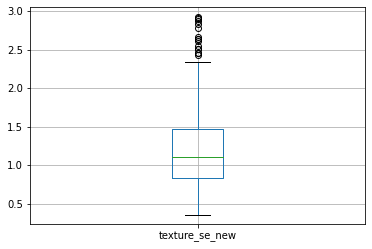

In [84]:
texture_se_new_boxplot = df.boxplot(column=['texture_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


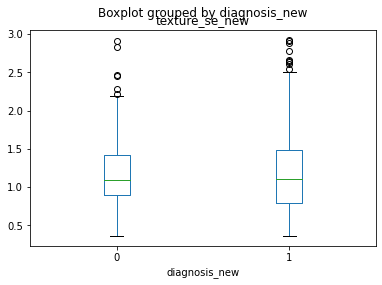

In [85]:
df.boxplot(by ='diagnosis_new', column =['texture_se_new'], grid = False)
#Not much difference in median between the two. Will need to check the p-value during model building

#Exploring Variable - Texture worst

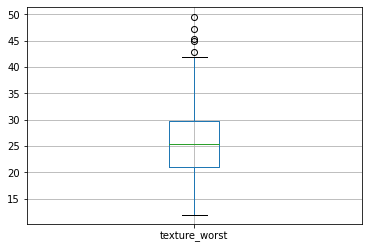

In [86]:
texture_worst_boxplot = df.boxplot(column=['texture_worst'])
#High-side outliers in the data

In [87]:
df['texture_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile value

0.00    12.0200
0.10    17.8000
0.20    20.1760
0.30    21.9880
0.40    23.5840
0.50    25.4100
0.60    26.7240
0.70    28.4600
0.80    30.9080
0.90    33.6460
0.91    34.0100
0.92    34.4372
0.93    34.9772
0.94    35.6268
0.95    36.3000
0.96    37.1384
0.97    38.0432
0.98    39.2752
0.99    41.8024
1.00    49.5400
Name: texture_worst, dtype: float64

In [88]:
print(df['texture_worst'].mean())
print(df['texture_worst'].median())
#Mean and Median almost equal

25.677223198594014
25.41


In [89]:
median_texture_worst=df['texture_worst'].median()
df['texture_worst_new']=df['texture_worst']
df['texture_worst_new'][df['texture_worst_new']>42]=median_texture_worst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


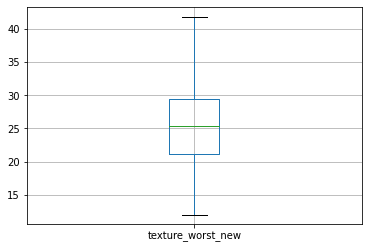

In [90]:
texture_worst_new_boxplot = df.boxplot(column=['texture_worst_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


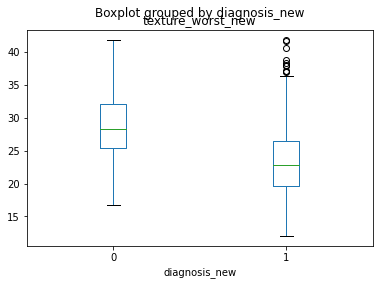

In [91]:
df.boxplot(by ='diagnosis_new', column =['texture_worst_new'], grid = False)
#slight difference in median between the two. Will need to check the p-value during model building

#Exploring Variable - Perimeter se

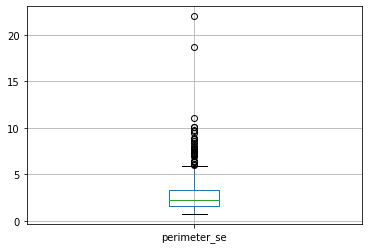

In [92]:
perimeter_se_boxplot = df.boxplot(column=['perimeter_se'])
#High-side outliers in the data

In [93]:
df['perimeter_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile value

0.00     0.75700
0.10     1.28020
0.20     1.51660
0.30     1.74080
0.40     2.03940
0.50     2.28700
0.60     2.59080
0.70     3.05020
0.80     3.76780
0.90     5.12320
0.91     5.33656
0.92     5.51624
0.93     5.80556
0.94     6.29780
0.95     7.04160
0.96     7.25512
0.97     7.73060
0.98     8.62740
0.99     9.69004
1.00    21.98000
Name: perimeter_se, dtype: float64

In [94]:
print(df['perimeter_se'].mean())
print(df['perimeter_se'].median())
#Mean and Median very near

2.8660592267135288
2.287


In [95]:
median_perimeter_se=df['perimeter_se'].median()
df['perimeter_se_new']=df['perimeter_se']
df['perimeter_se_new'][df['perimeter_se_new']>10]=median_perimeter_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


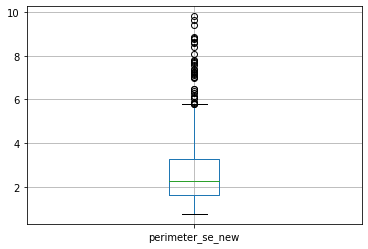

In [96]:
perimeter_se_boxplot = df.boxplot(column=['perimeter_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


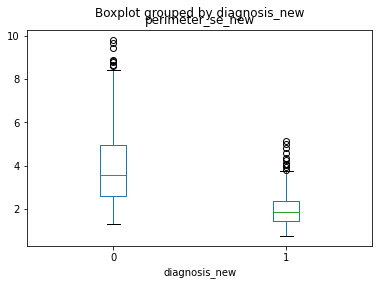

In [97]:
df.boxplot(by ='diagnosis_new', column =['perimeter_se_new'], grid = False)
#Difference in median between the two. if perimeter_se_new is more than 4, chances of tumor being malign is high

#Exploring Variable - Perimeter worst

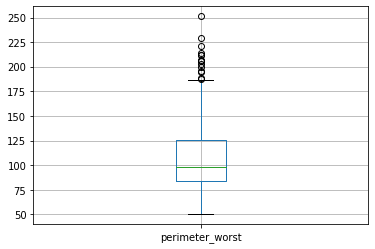

In [98]:
perimeter_worst_boxplot = df.boxplot(column=['perimeter_worst'])
#High-side outliers in the data

In [99]:
df['perimeter_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile value

0.00     50.410
0.10     72.178
0.20     81.402
0.30     86.328
0.40     91.304
0.50     97.660
0.60    105.740
0.70    115.900
0.80    133.500
0.90    157.740
0.91    159.976
0.92    161.312
0.93    163.704
0.94    168.088
0.95    171.640
0.96    177.736
0.97    184.584
0.98    195.576
0.99    208.304
1.00    251.200
Name: perimeter_worst, dtype: float64

In [100]:
print(df['perimeter_worst'].mean())
print(df['perimeter_worst'].median())
#gap between mean and median

107.2612126537786
97.66


In [101]:
median_perimeter_worse=df['perimeter_worst'].median()
df['perimeter_worst_new']=df['perimeter_worst']
df['perimeter_worst_new'][df['perimeter_worst_new']>209]=median_perimeter_worse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


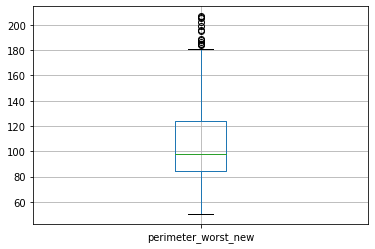

In [102]:
perimeter_worst_new_boxplot = df.boxplot(column=['perimeter_worst_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


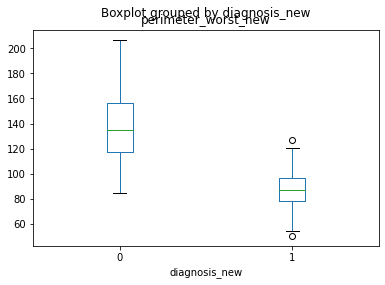

In [103]:
df.boxplot(by ='diagnosis_new', column =['perimeter_worst_new'], grid = False)
#significant difference in median between the two. if perimeter_worst_new is more than 120, chances of tumor being malign is high

#Exploring Variable - Area se

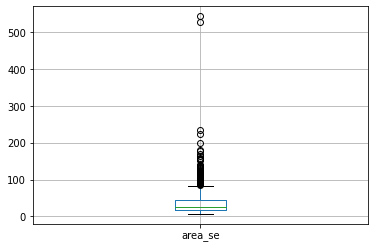

In [104]:
area_se_boxplot = df.boxplot(column=['area_se'])
#High-side outliers in the data

In [105]:
df['area_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile value

0.00      6.8020
0.10     13.1600
0.20     16.6400
0.30     19.0380
0.40     21.0780
0.50     24.5300
0.60     29.3220
0.70     38.4300
0.80     54.0880
0.90     91.3140
0.91     94.3908
0.92     98.9388
0.93    103.6720
0.94    106.3680
0.95    115.8000
0.96    122.8880
0.97    134.7280
0.98    154.9360
0.99    177.6840
1.00    542.2000
Name: area_se, dtype: float64

In [106]:
print(df['area_se'].mean())
print(df['area_se'].median())
#Huge gap between mean and median

40.33707908611603
24.53


In [107]:
median_area_se=df['area_se'].median()
df['area_se_new']=df['area_se']
df['area_se_new'][df['area_se_new']>180]=median_area_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


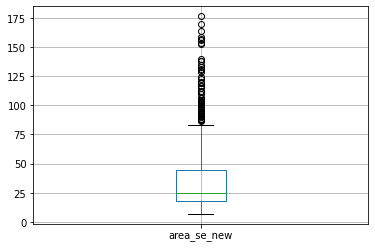

In [108]:
area_se_new_boxplot = df.boxplot(column=['area_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


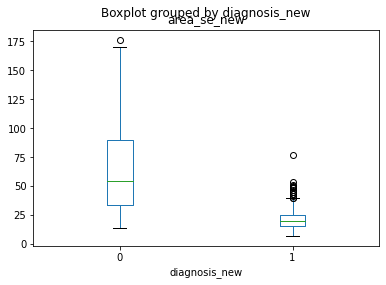

In [109]:
df.boxplot(by ='diagnosis_new', column =['area_se_new'], grid = False)
#significant difference in median between the two. if area_se_new is more than 30, chances of tumor being malign is high

#Exploring Variable - Area worst

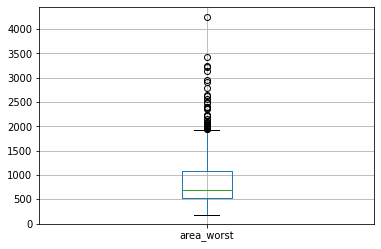

In [110]:
area_worst_boxplot = df.boxplot(column=['area_worst'])
#High-side outliers in the data

In [111]:
df['area_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile value

0.00     185.20
0.10     384.72
0.20     475.98
0.30     544.14
0.40     599.70
0.50     686.50
0.60     781.18
0.70     926.96
0.80    1269.00
0.90    1673.00
0.91    1730.16
0.92    1771.20
0.93    1849.28
0.94    1937.60
0.95    2009.60
0.96    2075.24
0.97    2231.80
0.98    2491.08
0.99    2918.16
1.00    4254.00
Name: area_worst, dtype: float64

In [112]:
median_area_worst=df['area_worst'].median()
df['area_worst_new']=df['area_worst']
df['area_worst_new'][df['area_worst_new']>2920]=median_area_worst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


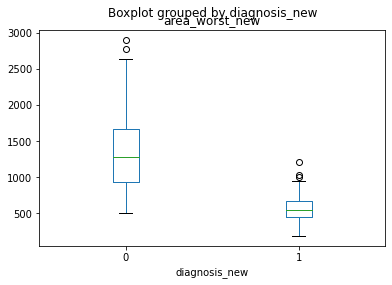

In [113]:
df.boxplot(by ='diagnosis_new', column =['area_worst_new'], grid = False)
#significant difference in median between the two. if area_worst_new is more than 1000, chances of tumor being malign is high

#Exploring Variable - Smoothness se

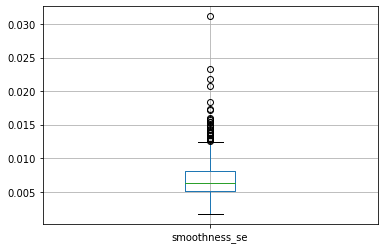

In [114]:
smoothness_se_boxplot = df.boxplot(column=['smoothness_se'])

In [115]:
df['smoothness_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#treating 100th percentile value

0.00    0.001713
0.10    0.004224
0.20    0.004871
0.30    0.005417
0.40    0.005843
0.50    0.006380
0.60    0.006944
0.70    0.007773
0.80    0.008828
0.90    0.010410
0.91    0.010707
0.92    0.010957
0.93    0.011376
0.94    0.011928
0.95    0.012644
0.96    0.012955
0.97    0.013848
0.98    0.015280
0.99    0.017258
1.00    0.031130
Name: smoothness_se, dtype: float64

In [116]:
print(df['smoothness_se'].mean())
print(df['smoothness_se'].median())
# mean and median are close

0.007040978910369071
0.00638


In [117]:
median_smoothness_se=df['smoothness_se'].median()
df['smoothness_se_new']=df['smoothness_se']
df['smoothness_se_new'][df['smoothness_se_new']>0.012]=median_smoothness_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


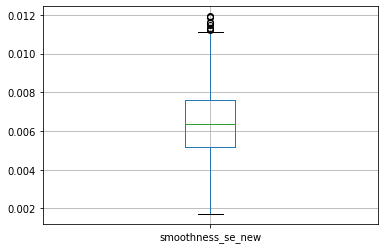

In [118]:
smoothness_se_boxplot = df.boxplot(column=['smoothness_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


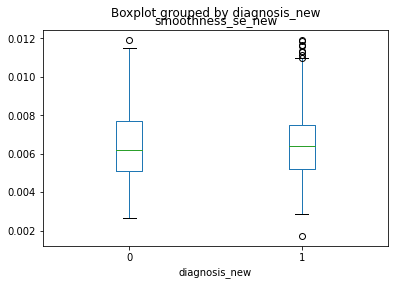

In [119]:
df.boxplot(by ='diagnosis_new', column =['smoothness_se_new'], grid = False)
#significant difference in median between the two. 

#Exploring Variable - Smoothness worst (did not treat outliers)

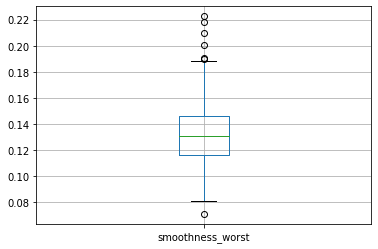

In [120]:
smoothness_worst_boxplot = df.boxplot(column=['smoothness_worst'])
#Box plot looks well distributed. Not treating outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


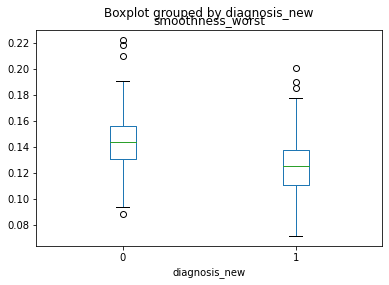

In [121]:
df.boxplot(by ='diagnosis_new', column =['smoothness_worst'], grid = False)
#No significant difference in median between the two. Need to check p-value for impact

#Exploring Variable - Compactness se

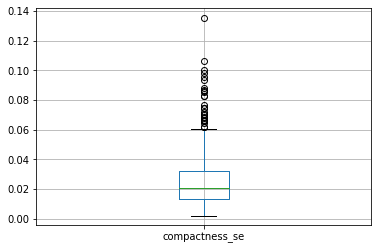

In [122]:
compactness_se_boxplot = df.boxplot(column=['compactness_se'])

In [123]:
df['compactness_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace that with median

0.00    0.002252
0.10    0.009169
0.20    0.011800
0.30    0.014240
0.40    0.017020
0.50    0.020450
0.60    0.024480
0.70    0.030136
0.80    0.036198
0.90    0.047602
0.91    0.049021
0.92    0.051216
0.93    0.053841
0.94    0.058273
0.95    0.060578
0.96    0.066088
0.97    0.070548
0.98    0.080392
0.99    0.089872
1.00    0.135400
Name: compactness_se, dtype: float64

In [124]:
print(df['compactness_se'].mean())
print(df['compactness_se'].median())
#Mean and median are closer

0.025478138840070306
0.02045


In [125]:
median_compactness_se=df['compactness_se'].median()
df['compactness_se_new']=df['compactness_se']
df['compactness_se_new'][df['compactness_se_new']>0.09]=median_compactness_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


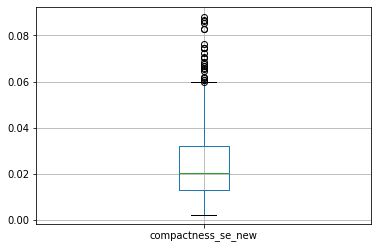

In [126]:
compactness_se_new_boxplot = df.boxplot(column=['compactness_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


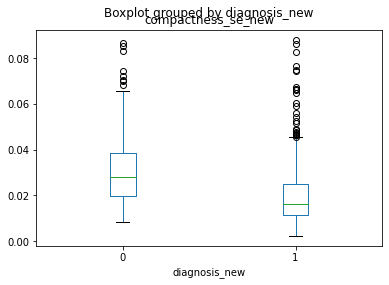

In [127]:
df.boxplot(by ='diagnosis_new', column =['compactness_se_new'], grid = False)
# Variatio in compactness se median between benign and malignant cases. If concavity_se is more than 0.045, chances are high that the tumor is malignant

#Exploring Variable - Compactness worst

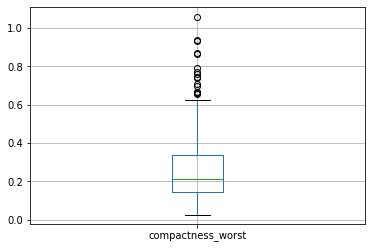

In [128]:
compactness_worst_boxplot = df.boxplot(column=['compactness_worst'])

In [129]:
df['compactness_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace that with median

0.00    0.027290
0.10    0.093676
0.20    0.125660
0.30    0.161400
0.40    0.184620
0.50    0.211900
0.60    0.251400
0.70    0.303960
0.80    0.367060
0.90    0.447840
0.91    0.466296
0.92    0.478836
0.93    0.505656
0.94    0.534188
0.95    0.564120
0.96    0.592260
0.97    0.616184
0.98    0.687424
0.99    0.778644
1.00    1.058000
Name: compactness_worst, dtype: float64

In [130]:
print(df['compactness_worst'].mean())
print(df['compactness_worst'].median())
#Mean and median are closer

0.25426504393673144
0.2119


In [131]:
median_compactness_worst=df['compactness_worst'].median()
df['compactness_worst_new']=df['compactness_worst']
df['compactness_worst_new'][df['compactness_worst_new']>0.78]=median_compactness_worst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


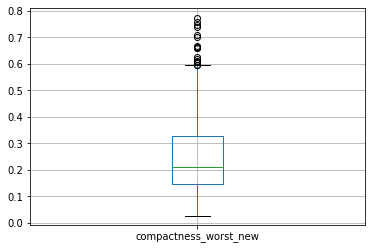

In [132]:
compactness_worst_new_boxplot = df.boxplot(column=['compactness_worst_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


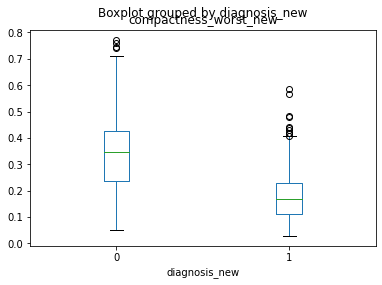

In [133]:
df.boxplot(by ='diagnosis_new', column =['compactness_worst_new'], grid = False)
# Variation in compactness worst median between benign and malignant cases. If compactness_worst_new is more than 0.4, chances are high that the tumor is malignant

#Exploring Variable - Concavity se

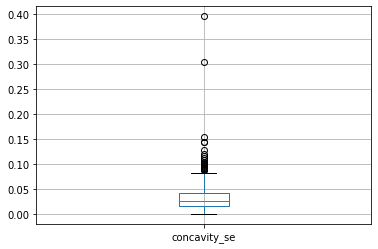

In [134]:
concavity_se_boxplot = df.boxplot(column=['concavity_se'])

In [135]:
df['concavity_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace that with median

0.00    0.000000
0.10    0.007726
0.20    0.013212
0.30    0.016980
0.40    0.020456
0.50    0.025890
0.60    0.030544
0.70    0.037362
0.80    0.046404
0.90    0.058520
0.91    0.060656
0.92    0.064120
0.93    0.066959
0.94    0.074602
0.95    0.078936
0.96    0.081787
0.97    0.092626
0.98    0.101584
0.99    0.122292
1.00    0.396000
Name: concavity_se, dtype: float64

In [136]:
print(df['concavity_se'].mean())
print(df['concavity_se'].median())
#Mean and median are closer

0.031893716344463946
0.02589


In [137]:
median_concavity_se=df['concavity_se'].median()
df['concavity_se_new']=df['concavity_se']
df['concavity_se_new'][df['concavity_se_new']>0.13]=median_concavity_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


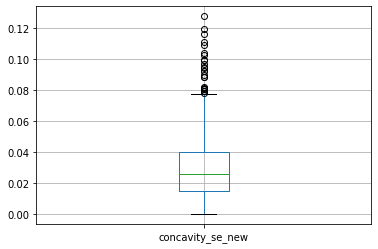

In [138]:
concavity_se_new_boxplot = df.boxplot(column=['concavity_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


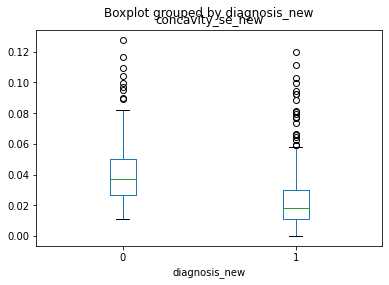

In [139]:
df.boxplot(by ='diagnosis_new', column =['concavity_se_new'], grid = False)
# Variatio in concavity se median between benign and malignant cases. If concavity_se is more than 0.06, chances are high that the tumor is malignant

#Exploring Variable - Concavity worst

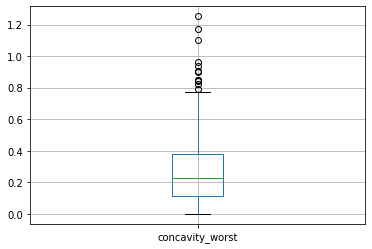

In [140]:
concavity_worst_boxplot = df.boxplot(column=['concavity_worst'])

In [141]:
df['concavity_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform except 100th percentile. will replace that with median

0.00    0.000000
0.10    0.045652
0.20    0.091974
0.30    0.136880
0.40    0.177180
0.50    0.226700
0.60    0.286600
0.70    0.349920
0.80    0.419540
0.90    0.571320
0.91    0.582880
0.92    0.606416
0.93    0.631220
0.94    0.654960
0.95    0.682380
0.96    0.696580
0.97    0.723708
0.98    0.783260
0.99    0.902380
1.00    1.252000
Name: concavity_worst, dtype: float64

In [142]:
print(df['concavity_worst'].mean())
print(df['concavity_worst'].median())
#Mean and median are closer

0.27218848330404205
0.2267


In [143]:
median_concavity_worst=df['concavity_worst'].median()
df['concavity_worst_new']=df['concavity_worst']
df['concavity_worst_new'][df['concavity_worst_new']>0.91]=median_concavity_worst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


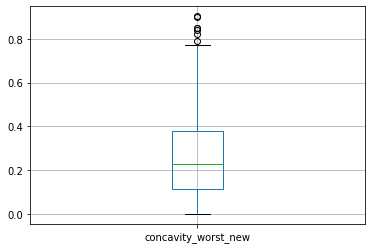

In [144]:
concavity_worst_new_boxplot = df.boxplot(column=['concavity_worst_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


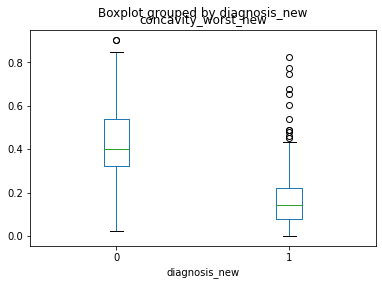

In [145]:
df.boxplot(by ='diagnosis_new', column =['concavity_worst_new'], grid = False)
# Variatio in concavity worst median between benign and malignant cases. If concavity_worst is more than 0.4, chances are high that the tumor is malignant

#Exploring Variable - Concave points se

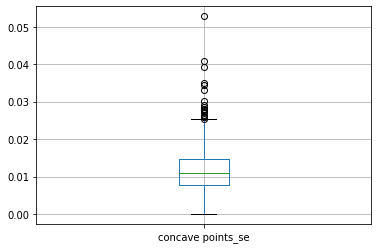

In [146]:
concave_points_se_boxplot = df.boxplot(column=['concave points_se'])

In [147]:
df['concave points_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution is uniform, except for 99th and 100th percentile

0.00    0.000000
0.10    0.005493
0.20    0.006893
0.30    0.008465
0.40    0.009617
0.50    0.010930
0.60    0.012410
0.70    0.013700
0.80    0.015812
0.90    0.018688
0.91    0.019109
0.92    0.019828
0.93    0.020624
0.94    0.021854
0.95    0.022884
0.96    0.024557
0.97    0.025907
0.98    0.027688
0.99    0.031194
1.00    0.052790
Name: concave points_se, dtype: float64

In [148]:
print(df['concave points_se'].mean())
print(df['concave points_se'].median())
#Mean and Median are very close. Data is well spread

0.011796137082601056
0.01093


In [149]:
median_concave_points_se=df['concave points_se'].median()
df['concave_points_se_new']=df['concave points_se']
df['concave_points_se_new'][df['concave_points_se_new']>0.028]=median_concave_points_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


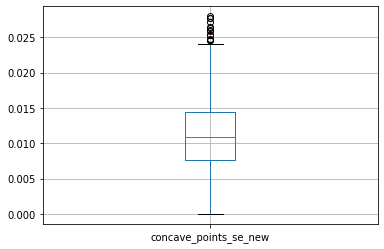

In [150]:
concave_points_se_new_boxplot = df.boxplot(column=['concave_points_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


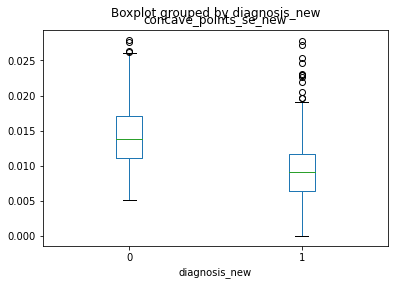

In [151]:
df.boxplot(by ='diagnosis_new', column =['concave_points_se_new'], grid = False)
# Variation in concavity points median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Concave points worst (did not treat outliers)

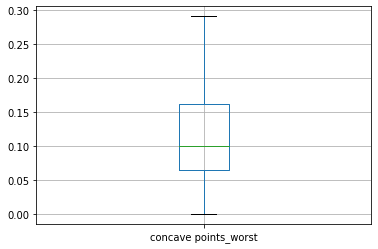

In [152]:
concave_points_worst_boxplot = df.boxplot(column=['concave points_worst'])

In [153]:
df['concave points_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution is uniform. No treatmeant needed

0.00    0.000000
0.10    0.038460
0.20    0.058086
0.30    0.071656
0.40    0.083914
0.50    0.099930
0.60    0.121800
0.70    0.150800
0.80    0.177540
0.90    0.208940
0.91    0.211288
0.92    0.215024
0.93    0.221912
0.94    0.225476
0.95    0.236920
0.96    0.244040
0.97    0.250796
0.98    0.258652
0.99    0.269216
1.00    0.291000
Name: concave points_worst, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


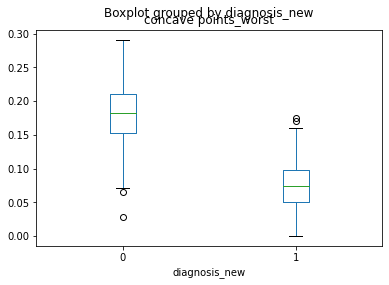

In [154]:
df.boxplot(by ='diagnosis_new', column =['concave points_worst'], grid = False)
# Variatio in concavity median between benign and malignant cases. This variable may be an influencing factor

#Exploring Variable - Symmetry se

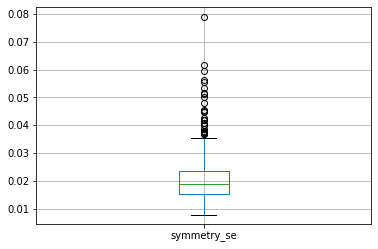

In [155]:
symmetry_mean_se_boxplot = df.boxplot(column=['symmetry_se'])

In [156]:
df['symmetry_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform, except 0, 99 and 100th percentile

0.00    0.007882
0.10    0.013012
0.20    0.014540
0.30    0.015704
0.40    0.017170
0.50    0.018730
0.60    0.020066
0.70    0.021978
0.80    0.025680
0.90    0.030120
0.91    0.031108
0.92    0.031672
0.93    0.032688
0.94    0.034145
0.95    0.034988
0.96    0.037568
0.97    0.040748
0.98    0.044936
0.99    0.052208
1.00    0.078950
Name: symmetry_se, dtype: float64

In [157]:
print(df['symmetry_se'].mean())
print(df['symmetry_se'].median())
#Mean and Median are closer. Data is uniformly spread

0.020542298769771532
0.01873


In [158]:
median_symmetry_se=df['symmetry_se'].median()
df['symmetry_se_new']=df['symmetry_se']
df['symmetry_se_new'][df['symmetry_se_new']<0.01]=median_symmetry_se
df['symmetry_se_new'][df['symmetry_se_new']>0.045]=median_symmetry_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


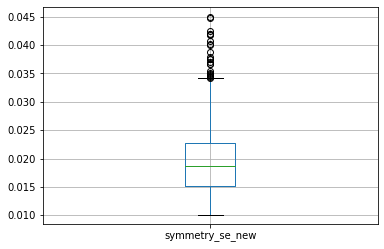

In [159]:
symmetry_se_new_boxplot = df.boxplot(column=['symmetry_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


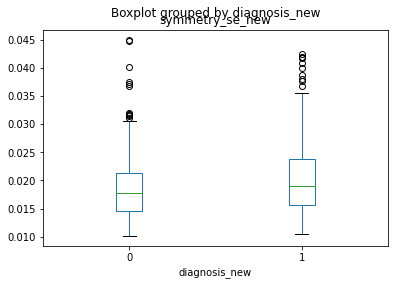

In [160]:
df.boxplot(by ='diagnosis_new', column =['symmetry_se_new'], grid = False)
# Slight Variatio in symmetry median between benign and malignant cases. If Symmetry se new value is more than o.03, chances are high that the tumor is benign

#Exploring Variable - Symmetry worst

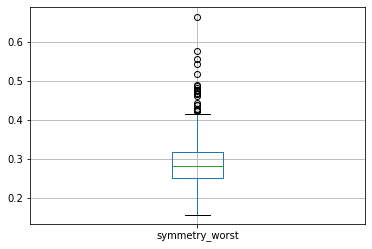

In [161]:
symmetry_mean_worst_boxplot = df.boxplot(column=['symmetry_worst'])

In [162]:
df['symmetry_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform, except for 0 and 100th percentile

0.00    0.156500
0.10    0.226120
0.20    0.243620
0.30    0.256520
0.40    0.269400
0.50    0.282200
0.60    0.296480
0.70    0.310220
0.80    0.325380
0.90    0.360080
0.91    0.365004
0.92    0.369168
0.93    0.376084
0.94    0.395152
0.95    0.406160
0.96    0.417192
0.97    0.436216
0.98    0.467448
0.99    0.486908
1.00    0.663800
Name: symmetry_worst, dtype: float64

In [163]:
print(df['symmetry_worst'].mean())
print(df['symmetry_worst'].median())
#Mean and Median are closer. Data is uniformly spread

0.29007557117750454
0.2822


In [164]:
median_symmetry_worst=df['symmetry_worst'].median()
df['symmetry_worst_new']=df['symmetry_worst']
df['symmetry_worst_new'][df['symmetry_worst_new']<0.22]=median_symmetry_worst
df['symmetry_worst_new'][df['symmetry_worst_new']>0.49]=median_symmetry_worst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


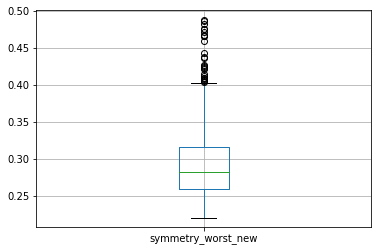

In [165]:
symmetry_mean_worst_new_boxplot = df.boxplot(column=['symmetry_worst_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


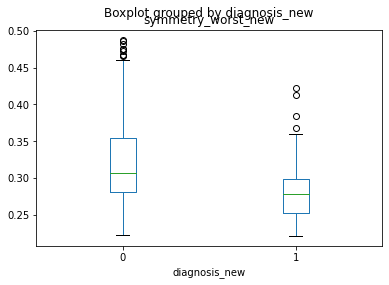

In [166]:
df.boxplot(by ='diagnosis_new', column =['symmetry_worst_new'], grid = False)
# Slight Variatio in symmetry median between benign and malignant cases. If Symmetry_worst_new value is more than o.35, chances are high that the tumor is malignant

#Exploring Variable - Fractal Dimension se

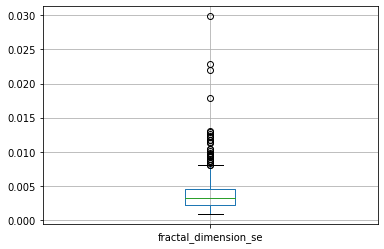

In [167]:
fractal_dimension_se_boxplot = df.boxplot(column=['fractal_dimension_se'])

In [168]:
df['fractal_dimension_se'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform, except the 100th percentile

0.00    0.000895
0.10    0.001710
0.20    0.002057
0.30    0.002382
0.40    0.002752
0.50    0.003187
0.60    0.003611
0.70    0.004172
0.80    0.004830
0.90    0.006185
0.91    0.006348
0.92    0.006821
0.93    0.007137
0.94    0.007555
0.95    0.007960
0.96    0.008745
0.97    0.009624
0.98    0.011415
0.99    0.012650
1.00    0.029840
Name: fractal_dimension_se, dtype: float64

In [169]:
print(df['fractal_dimension_se'].mean())
print(df['fractal_dimension_se'].median())
#Mean and Median almost similar. Data is uniformly spread

0.0037949038664323383
0.003187


In [170]:
median_fractal_se=df['fractal_dimension_se'].median()
df['fractal_dimension_se_new']=df['fractal_dimension_se']
df['fractal_dimension_se_new'][df['fractal_dimension_se_new']>0.013]=median_fractal_se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


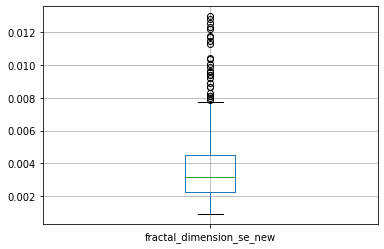

In [171]:
fractal_dimension_se_new_boxplot = df.boxplot(column=['fractal_dimension_se_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


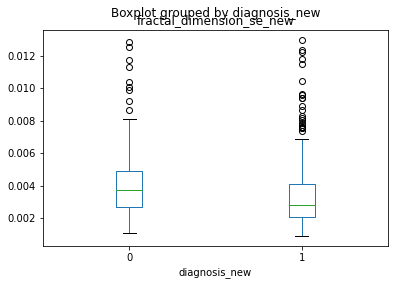

In [172]:
df.boxplot(by ='diagnosis_new', column =['fractal_dimension_se_new'], grid = False)
# slight Variatio in Fractal Dimesnion median between benign and malignant cases. Need to take further action in the next stage

#Exploring Variable - Fractal Dimension worst

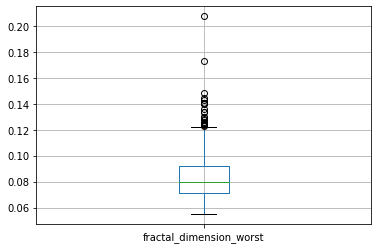

In [173]:
fractal_dimension_worst_boxplot = df.boxplot(column=['fractal_dimension_worst'])

In [174]:
df['fractal_dimension_worst'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
#Distribution appears to be uniform, except the 100th percentile

0.00    0.055040
0.10    0.065792
0.20    0.069654
0.30    0.073462
0.40    0.076852
0.50    0.080040
0.60    0.083202
0.70    0.088984
0.80    0.095934
0.90    0.106320
0.91    0.107188
0.92    0.109048
0.93    0.113440
0.94    0.117444
0.95    0.119520
0.96    0.123496
0.97    0.125200
0.98    0.132388
0.99    0.140628
1.00    0.207500
Name: fractal_dimension_worst, dtype: float64

In [175]:
print(df['fractal_dimension_worst'].mean())
print(df['fractal_dimension_worst'].median())
#Mean and Median almost similar. Data is uniformly spread

0.08394581722319855
0.08004


In [176]:
median_fractal_worst=df['fractal_dimension_worst'].median()
df['fractal_dimension_worst_new']=df['fractal_dimension_worst']
df['fractal_dimension_worst_new'][df['fractal_dimension_worst_new']>0.15]=median_fractal_worst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


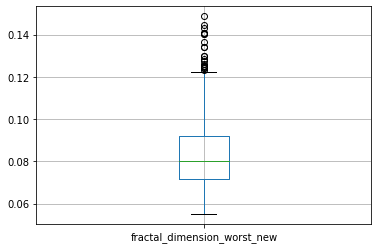

In [177]:
fractal_dimension_worst_new_boxplot = df.boxplot(column=['fractal_dimension_worst_new'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


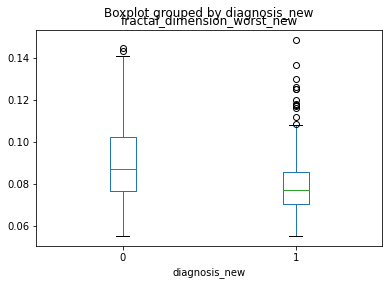

In [178]:
df.boxplot(by ='diagnosis_new', column =['fractal_dimension_worst_new'], grid = False)
# slight Variatio in Fractal Dimesnion median between benign and malignant cases. If the worst fractal dimension is more than 0.11, chances are high that the tumor is malignant

In [222]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_new',
       'radius_mean_new', 'texture_mean_new', 'area_mean_new',
       'smoothness_mean_new', 'compactness_mean_new', 'concavity_mean_new',
       'concave_points_mean_new', 'radius_se_new', 'texture_se_new',
       'texture_worst_new', 'perimeter_se_new', 'perimeter_worst_new',
       'area_se_new', 'area_worst_new', 'smoothness_se_new',
       'compactness_se_new', 'compa

#Individual Impact of Variables

In [220]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_new',
       'radius_mean_new', 'texture_mean_new', 'area_mean_new',
       'smoothness_mean_new', 'compactness_mean_new', 'concavity_mean_new',
       'concave_points_mean_new', 'radius_se_new', 'texture_se_new',
       'texture_worst_new', 'perimeter_se_new', 'perimeter_worst_new',
       'area_se_new', 'area_worst_new', 'smoothness_se_new',
       'compactness_se_new', 'compa

In [242]:
df2=df[['radius_mean_new', 'texture_mean_new', 'perimeter_mean', 'area_mean_new', 'smoothness_mean_new', 'compactness_mean_new',
        'concavity_mean_new', 'concave_points_mean_new', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se_new', 'radius_worst','texture_se_new', 
        'texture_worst_new','perimeter_se_new','perimeter_worst_new', 'area_se_new',  'area_worst_new', 'smoothness_se_new',  'smoothness_worst',
       'compactness_se_new', 'compactness_worst_new','concavity_se_new', 'concavity_worst_new','concave_points_se_new',  'concave points_worst',
        'symmetry_se_new', 'symmetry_worst_new', 'fractal_dimension_se_new', 'fractal_dimension_worst_new', 'diagnosis_new']]

In [243]:
df3=df2.rename(columns = {'concave points_worst':'concave_points_worst'})

In [244]:
df3.columns

Index(['radius_mean_new', 'texture_mean_new', 'perimeter_mean',
       'area_mean_new', 'smoothness_mean_new', 'compactness_mean_new',
       'concavity_mean_new', 'concave_points_mean_new', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se_new', 'radius_worst',
       'texture_se_new', 'texture_worst_new', 'perimeter_se_new',
       'perimeter_worst_new', 'area_se_new', 'area_worst_new',
       'smoothness_se_new', 'smoothness_worst', 'compactness_se_new',
       'compactness_worst_new', 'concavity_se_new', 'concavity_worst_new',
       'concave_points_se_new', 'concave_points_worst', 'symmetry_se_new',
       'symmetry_worst_new', 'fractal_dimension_se_new',
       'fractal_dimension_worst_new', 'diagnosis_new'],
      dtype='object')

In [218]:
import statsmodels.formula.api as sm

In [245]:
model = sm.ols(formula ='diagnosis_new ~ radius_mean_new+ texture_mean_new + perimeter_mean + concavity_mean_new + area_mean_new + smoothness_mean_new + compactness_mean_new + concave_points_mean_new + symmetry_mean + fractal_dimension_mean + radius_se_new + radius_worst + texture_se_new + texture_worst_new + perimeter_se_new + perimeter_worst_new + area_se_new + area_worst_new + smoothness_se_new + smoothness_worst + compactness_se_new + compactness_worst_new + concavity_se_new + concavity_worst_new + concave_points_se_new + concave_points_worst + symmetry_se_new + symmetry_worst_new + fractal_dimension_se_new + fractal_dimension_worst_new', data = df3)

In [246]:
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          diagnosis_new   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     62.05
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.07e-153
Time:                        02:02:52   Log-Likelihood:                 31.507
No. Observations:                 569   AIC:                            -1.013
Df Residuals:                     538   BIC:                             133.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.0293      0.296      6.858      0.000       1.448       2.610
radius_mean_new                -0.0027      0.009     -0.292      0.770      -0.021       0.016
texture_mean_new               -0.0077      0.006     -1.221      0.223      -0.020       0.005
perimeter_mean                  0.0005      0.003      0.154      0.878      -0.005       0.006
concavity_mean_new             -1.3973      0.347     -4.029      0.000      -2.079      -0.716
area_mean_new                  -0.0002   8.86e-05     -2.524      0.012      -0.000   -4.96e-05
smoothness_mean_new             1.1345      1.721      0.659      0.510      -2.246       4.515
compactness_mean_new            0.7344      0.568      1.294      0.196      -0.381       1.850
concave_points_mean_new        -2.7871      1.270     -2.195      0.029      -5.282      -0.293
symmetry_mean                   0.0422      0.549      0.077      0.939      -1.037       1.122
fractal_dimension_mean          7.5660      3.702      2.044      0.041       0.294      14.838
radius_se_new                  -0.3256      0.137     -2.374      0.018      -0.595      -0.056
radius_worst                   -0.0095      0.014     -0.676      0.499      -0.037       0.018
texture_se_new                  0.0203      0.037      0.548      0.584      -0.052       0.093
texture_worst_new              -0.0075      0.005     -1.382      0.168      -0.018       0.003
perimeter_se_new                0.0009      0.016      0.060      0.952      -0.030       0.032
perimeter_worst_new            -0.0011      0.001     -0.846      0.398      -0.004       0.001
area_se_new                     0.0010      0.001      1.044      0.297      -0.001       0.003
area_worst_new              -1.156e-05   6.37e-05     -0.181      0.856      -0.000       0.000
smoothness_se_new              -8.0540      7.592     -1.061      0.289     -22.967       6.859
smoothness_worst               -2.5231      1.108     -2.277      0.023      -4.700      -0.347
compactness_se_new             -0.0103      1.646     -0.006      0.995      -3.244       3.223
compactness_worst_new           0.3774      0.209      1.804      0.072      -0.034       0.789
concavity_se_new                1.4516      1.063      1.365      0.173      -0.637       3.540
concavity_worst_new            -0.2071      0.160     -1.294      0.196      -0.521       0.107
concave_points_se_new          -0.8190      4.559     -0.180      0.858      -9.774       8.137
concave_points_worst           -0.6403      0.747     -0.857      0.392      -2.107       0.827
symmetry_se_new                 1.2405      2.390      0.519      0.604      -3.455       5.936
symmetry_worst_new             -1.2525      0.326     -3.839      0.000      -1.893      -0.612
fractal_dim

In [247]:
df4 = df3.drop(['radius_mean_new','texture_mean_new','perimeter_mean','smoothness_mean_new','compactness_mean_new','symmetry_mean','radius_worst','texture_se_new','texture_worst_new','perimeter_se_new','perimeter_worst_new','area_se_new','area_worst_new','smoothness_se_new','compactness_se_new','compactness_worst_new','concavity_se_new','concavity_worst_new','concave_points_se_new','concave_points_worst','symmetry_se_new','fractal_dimension_se_new'],axis=1)

In [248]:
df4.columns

Index(['area_mean_new', 'concavity_mean_new', 'concave_points_mean_new',
       'fractal_dimension_mean', 'radius_se_new', 'smoothness_worst',
       'symmetry_worst_new', 'fractal_dimension_worst_new', 'diagnosis_new'],
      dtype='object')

In [249]:
model1 = sm.ols(formula ='diagnosis_new ~ concavity_mean_new + area_mean_new + concave_points_mean_new + fractal_dimension_mean + radius_se_new + smoothness_worst + symmetry_worst_new + fractal_dimension_worst_new', data = df4)

In [250]:
fitted2 = model1.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          diagnosis_new   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     206.2
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.93e-161
Time:                        02:03:06   Log-Likelihood:                -3.3769
No. Observations:                 569   AIC:                             24.75
Df Residuals:                     560   BIC:                             63.85
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2430      0.155      8.011      0.000       0.938       1.548
concavity_mean_new             -1.4828      0.291     -5.093      0.000      -2.055      -0.911
area_mean_new                  -0.0003   6.81e-05     -5.006      0.000      -0.000      -0.000
concave_points_mean_new        -3.1541      0.547     -5.764      0.000      -4.229      -2.079
fractal_dimension_mean         18.5668      2.693      6.894      0.000      13.277      23.857
radius_se_new                  -0.3111      0.065     -4.796      0.000      -0.439      -0.184
smoothness_worst               -3.7515      0.620     -6.047      0.000      -4.970      -2.533
symmetry_worst_new             -1.1325      0.243     -4.652      0.000      -1.611      -0.654
fractal_dimension_worst_new    -4.1400      1.135     -3.648      0.000      -6.369      -1.911
==============================================================================
Omnibus:                       53.025   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.259
Skew:                          -0.752   Prob(JB):                     2.48e-15
Kurtosis:                       3.757   Cond. No.                     1.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Multicollinearity

In [251]:
#After cleaning the data, we need to check for VIF
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [252]:
vif_cal(input_data=df4, dependent_col="diagnosis_new")
#No variables with VIF more than 5. Retaining all

area_mean_new  VIF =  3.67
concavity_mean_new  VIF =  3.32
concave_points_mean_new  VIF =  4.25
fractal_dimension_mean  VIF =  3.41
radius_se_new  VIF =  2.15
smoothness_worst  VIF =  1.89
symmetry_worst_new  VIF =  1.38
fractal_dimension_worst_new  VIF =  3.47


#Building Logistic Regression Model

In [253]:
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()

In [263]:
col_names = df4.drop(['diagnosis_new'],axis=1)

In [264]:
x_col_names = col_names
x_col_names.columns.values

array(['area_mean_new', 'concavity_mean_new', 'concave_points_mean_new',
       'fractal_dimension_mean', 'radius_se_new', 'smoothness_worst',
       'symmetry_worst_new', 'fractal_dimension_worst_new'], dtype=object)

In [266]:
x = x_col_names
y = df4['diagnosis_new']

In [267]:
from sklearn import model_selection
x_train , x_test , y_train , y_test = model_selection. train_test_split(x,y,test_size = 0.2)

In [268]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 8)
(114, 8)
(455,)
(114,)


In [269]:
logistic1.fit(x_train,y_train)

LogisticRegression()

In [270]:
predict_train = logistic1.predict(x_train)
predict_test = logistic1.predict(x_test)

#Train Data Accuracy

In [271]:
from sklearn.metrics import confusion_matrix

In [272]:
cm_train = confusion_matrix(y_train,predict_train)
total_train = sum(sum(cm_train))
accuracy_train = (cm_train[0,0]+cm_train[1,1])/total_train
accuracy_train

0.9032967032967033

In [273]:
cm_test = confusion_matrix(y_test,predict_test)
total_test = sum(sum(cm_test))
accuracy_test = (cm_test[0,0]+cm_test[1,1])/total_test
accuracy_test

0.8947368421052632

In [274]:
accuracy1=(cm_train[0,0]+cm_train[1,1])/total_train
print ('Accuracy : ', accuracy1)

sensitivity1 = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9032967032967033
Sensitivity :  0.8208092485549133
Specificity :  0.9539007092198581


#Decision Tree (Depth 3) - Settled at this depth as at depth 2,4,5- the difference between train accuracy and test accuracy is high

In [311]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

In [312]:
from sklearn import model_selection
x_train1 , x_test1 , y_train1 , y_test1 = model_selection. train_test_split(x,y,test_size = 0.2)

In [313]:
clf.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=3)

In [314]:
predict_train1 = clf.predict(x_train1)
predict_test1 = clf.predict(x_test1)

In [315]:
cm_train1 = confusion_matrix(y_train1,predict_train1)
total_train1 = sum(sum(cm_train1))
accuracy_train_tree = (cm_train1[0,0]+cm_train1[1,1])/total_train1
accuracy_train_tree

0.945054945054945

In [316]:
cm_test1 = confusion_matrix(y_test1,predict_test1)
total_test1 = sum(sum(cm_test1))
accuracy_test_tree = (cm_test1[0,0]+cm_test1[1,1])/total_test1
accuracy_test_tree

0.9298245614035088

#Random Forest

In [318]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   area_mean_new                569 non-null    float64
 1   concavity_mean_new           569 non-null    float64
 2   concave_points_mean_new      569 non-null    float64
 3   fractal_dimension_mean       569 non-null    float64
 4   radius_se_new                569 non-null    float64
 5   smoothness_worst             569 non-null    float64
 6   symmetry_worst_new           569 non-null    float64
 7   fractal_dimension_worst_new  569 non-null    float64
 8   diagnosis_new                569 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 40.1 KB


In [355]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 200 , max_features=4 , max_depth = 4)

In [356]:
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=4, n_estimators=200)

In [357]:
predict_train2 = forest.predict(x_train)
predict_test2 = forest.predict(x_test)

In [358]:
cm_train2 = confusion_matrix(y_train,predict_train2)
total_train2 = sum(sum(cm_train2))
accuracy_train_forest = (cm_train2[0,0]+cm_train2[1,1])/total_train2
accuracy_train_forest

0.9758241758241758

In [359]:
cm_test2 = confusion_matrix(y_test,predict_test2)
total_test2 = sum(sum(cm_test2))
accuracy_test_forest = (cm_test2[0,0]+cm_test2[1,1])/total_test2
accuracy_test_forest

0.9298245614035088

In [360]:
accuracy1=(cm_train2[0,0]+cm_train2[1,1])/total_train2
print ('Accuracy : ', accuracy1)

sensitivity1 = cm_train2[0,0]/(cm_train2[0,0]+cm_train2[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_train2[1,1]/(cm_train2[1,0]+cm_train2[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9758241758241758
Sensitivity :  0.9653179190751445
Specificity :  0.9822695035460993


#ROC Curver and Area under Curve (AUC) :

In [361]:
from sklearn import metrics

In [362]:
print(metrics.roc_auc_score(y_train1, predict_train1))

0.9359979101358412


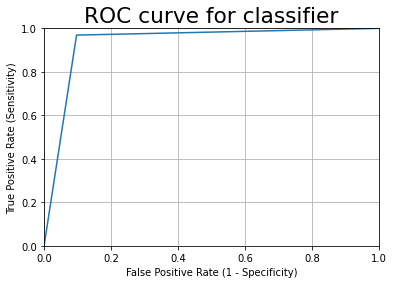

In [363]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_train1, predict_train1)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 18
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)